## An investigation into Physical Activity Monitoring using health data         

##### This project aims to investigate the health data that has been provided by the IMUs at Trivisio in an attempt to create a mathematical model, to create actionable plans and recommendations about the direction the corporation should head in with regard to the gathering of health data, and the next potential products that it should produce, or improvements that should be made within the field of IMUs. Such direction will be gathered from investigating the health data that the Colibri Wireless unit has provided from that we have collected from 9 subjects who wore 3 IMUs and a heart-rate monitor. These individuals did 12 different physical activities (e.g., walking, cycling, playing football), which allowed us to gather data that will be analysed to provide actionable recommendations for the future of the IMUs provided and health data provided by Triviso. (Lahrach & Radufe , 2018)

##### Throughout quartile 4 in 2017 we saw a significant advancement in the emergence of Inertial measurement units (IMU) being produced throughout the world, as Bosch developed the market's thinnest 6-axis IMU. This generated significant advancements throughout the field of technology and allowed Apple, one of the key competitors in gathering health data from Inertial measurement units to vastly improve the reliability of their products, leading to millions of sales of products such as iPhone 8, iPhone X, and Apple Watch Series 3, all of which were containing this new Bosch Sensortech, leading to profound advancements in our competitor's abilities to measure Acceleration, Gyroscopes, activity. (Lahrach & Radufe , 2018)

##### Thus, the development of significant advancements throughout the field of IMUs leads us to ponder the effectiveness of products being produced, in the rapidly advancing field of health technology, and data. 

## Section 1 - Data Cleansing and wrangling

#### To begin our investigation the first step is to begin cleansing our data, so that invalid, or unimportant entries which may impact the effectiveness of our analysis are removed, and import the relevant libraries for our analysis in order to ensure the code works, as intended from the use of such libraries. 

In [144]:
#importing relevant libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import itertools
import warnings

In [4]:
headers=['timestamp (seconds)','activity ID', 'heart rate (bpm)','hand - temperature', 'hand - 3D-acceleration scale: ±16g, resolution: 13-bit -1',  'hand - 3D-acceleration scale: ±16g, resolution: 13-bit -2','hand - 3D-acceleration scale: ±16g, resolution: 13-bit -3',  'hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -1','hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -2',  'hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -3','hand - 3D-gyroscope -1','hand - 3D-gyroscope -2','hand - 3D-gyroscope -3',  'hand - 3D-magnetometer -1','hand - 3D-magnetometer -2','hand - 3D-magnetometer -3','hand - orientation (invalid in this data collection) -1',  'hand - orientation (invalid in this data collection) -2','hand - orientation (invalid in this data collection) -3',  'hand - orientation (invalid in this data collection) -4','chest - temperature', 'chest - 3D-acceleration scale: ±16g, resolution: 13-bit -1',  'chest - 3D-acceleration scale: ±16g, resolution: 13-bit -2','chest - 3D-acceleration scale: ±16g, resolution: 13-bit -3',  'chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -1','chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -2',  'chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -3','chest - 3D-gyroscope -1','chest - 3D-gyroscope -2','chest - 3D-gyroscope -3', 'chest - 3D-magnetometer -1','chest - 3D-magnetometer -2','chest - 3D-magnetometer -3','chest - orientation (invalid in this data collection) -1',  'chest - orientation (invalid in this data collection) -2','chest - orientation (invalid in this data collection) -3',  'chest - orientation (invalid in this data collection) -4','ankle - temperature' ,'ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -1',  'ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -2','ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -3',  'ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -1','ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -2',  'ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -3','ankle - 3D-gyroscope -1','ankle - 3D-gyroscope -2','ankle - 3D-gyroscope -3',  'ankle - 3D-magnetometer -1','ankle - 3D-magnetometer -2','ankle - 3D-magnetometer -3','ankle - orientation (invalid in this data collection) -1',  'ankle - orientation (invalid in this data collection) -2','ankle - orientation (invalid in this data collection) -3',  'ankle - orientation (invalid in this data collection) -4']
df_raw=pd.DataFrame(columns=headers)
df_raw.insert(loc=0,column='Subject_ID',value="")
df_subjects=pd.DataFrame(data=[[101,'Male',27,182,83,75,193,'right'],[102,'Female',25,169,78,74,195,'right'],[103,'Male',31,187,92,68,189,'right'],[104,'Male',24,194,95,58,196,'right'],[105,'Male',26,180,73,70,194,'right'],[106,'Male',26,183,69,60,194,'right'],[107,'Male',23,173,86,60,197,'right'],[108,'Male',32,179,87,66,188,'left'],[109,'Male',31,168,65,54,189,'right']],columns=['Subject_ID','Sex','Age_(years)','Height_(cm)','Weight_(kg)','Resting HR_(bpm)','Max_HR_(bpm)','Dominant_hand'])

for i in np.arange(1,10,1):
    subject_id = f"1{i:0>2d}"
    df1=pd.read_csv(f"C:\\Users\\Aamir\\Documents\\Data Science Research methods coursework\\Dataset\\Dataset\\Protocol\\subject1{i:0>2d}.dat",names=headers,delimiter=" ")
    df1.insert(loc=0,column='Subject_ID',value=f"1{i:0>2d}")
    df_raw = pd.concat([df_raw, df1])
    del df1

df_raw.reset_index(drop=True,inplace=True)
df_raw.head()
#referenece 237779_DSRM Report 2-checkpoint.ipynb

,Subject_ID,timestamp (seconds),activity ID,heart rate (bpm),hand - temperature,"hand - 3D-acceleration scale: ±16g, resolution: 13-bit -1","hand - 3D-acceleration scale: ±16g, resolution: 13-bit -2","hand - 3D-acceleration scale: ±16g, resolution: 13-bit -3","hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -1","hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -2",...,ankle - 3D-gyroscope -1,ankle - 3D-gyroscope -2,ankle - 3D-gyroscope -3,ankle - 3D-magnetometer -1,ankle - 3D-magnetometer -2,ankle - 3D-magnetometer -3,ankle - orientation (invalid in this data collection) -1,ankle - orientation (invalid in this data collection) -2,ankle - orientation (invalid in this data collection) -3,ankle - orientation (invalid in this data collection) -4
0,101,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,101,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,101,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,101,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,101,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0


#### Above I have imported the data from each of the participants in our dataset. This contains information the data about the subjects from subject 101 to subject 109, and all the releveant data that was associated with each participant. Additionally, I had redefined the headers, so that each part of the data that was provided made sense, so that we are able to interpret our results at a later stage of this report. These files are all placed into one singular location referred to as df_raw which will allow us to easily modify and improve the main code at a later stage, if necessary. However, this will likely require additional wrangling and cleaning at a later stage.

In [5]:
print(df_subjects)

   Subject_ID     Sex  Age_(years)  Height_(cm)  Weight_(kg)  \
0         101    Male           27          182           83   
1         102  Female           25          169           78   
2         103    Male           31          187           92   
3         104    Male           24          194           95   
4         105    Male           26          180           73   
5         106    Male           26          183           69   
6         107    Male           23          173           86   
7         108    Male           32          179           87   
8         109    Male           31          168           65   

   Resting HR_(bpm)  Max_HR_(bpm) Dominant_hand  
0                75           193         right  
1                74           195         right  
2                68           189         right  
3                58           196         right  
4                70           194         right  
5                60           194         right  
6        

#### Above, I print out information relveant to each participants, in order to ensure that the output that I am seeing, seems reasonable in relation to what I have read about the dataset from our data provider, and this seems to be pulling through the data appropriately, and being displayed well. 

In [6]:
# removing activities containing 0 
df_raw=df_raw.loc[df_raw['activity ID']!=0]
#removing imprecisio in frequency between IMU + HR monitors
df_raw.drop(list(df_raw.filter(regex='scale: ±6g')),axis=1,inplace=True)
#removing invalid data
df_raw.drop(list(df_raw.filter(regex="invalid in this data collection")),axis=1,inplace=True)
#referenece 237779_DSRM Report 2-checkpoint.ipynb

#### The above values were removed, as activity id was equal to 0, and because the scale +6g was included in our data but not reliable, due to the high rate of acceleration, therefore the reliability of such data that was collected was poor, due to the data being highly saturated. Additionally, any columns which were invalid in this data were removed, using the code shown above.  

####  Additionally, 24 transanctional activities were included as breaks and labelled as 0s, so these needed to be removed, to preserve the meaningfulness of the data

####  Furthermore, as two accelerometers were worn by the participants in the trial, the data providers suggested that the 16 grams of resolution, and this was more reliable than 6 grams, and this is why 6 grams was removed for each measurement.

#### Lastly, the IMUs gathered data at a far slower rate, and this lead to 90.87%of missing data, but these were not removed, as these still contained valuable data from which analysis could be generated about the health data and our participants, in order to preserve the size of our data.

In [11]:
#Getting missing heart rates: 
missing_heart_count_alternative = (df_raw.loc[:, 'heart rate (bpm)'].isnull()).sum()

message = "There are " + format(missing_heart_count_alternative, ",") + " missing heart rate records due to difference in frequency."
print(message)
#referenece 237779_DSRM Report 2-checkpoint.ipynb

There are 1,765,464 missing heart rate records due to difference in frequency.


In [12]:
df_heart_fill=df_raw
df_heart_fill.loc[:,'heart rate (bpm)']=df_raw.loc[:,['heart rate (bpm)']].fillna(method='bfill',axis=0)
incomplete_records_count=df_heart_fill.isna().any(axis=0).sum()
data_set_size=df_heart_fill.shape[0]
print("After filling the missing heart data, there are " + f'{incomplete_records_count:,.0f}'.format(incomplete_records_count) + 
      " records missing one or more values, out of a data set of size " + f'{data_set_size:,.0f}'+".")
df_master=df_heart_fill.dropna(axis=0,how='any')
#referenece 237779_DSRM Report 2-checkpoint.ipynb

After filling the missing heart data, there are 31 records missing one or more values, out of a data set of size 1,942,872.


#### Through investigation of the data provided, I observed through the code that the data was missing a substantial proportion of the heart rate data, and so attempt to deal with these entries further below, by taking against action this to clean out these entries to preserve the quality of the data for analysis.


In [13]:
data_with_heart_rates = df_raw

data_with_heart_rates.update(df_raw[['heart rate (bpm)']].apply(lambda x: x.fillna(method='bfill')))

missing_feature_count = data_with_heart_rates.isnull().sum(axis=0).astype(bool).sum()

total_observations = len(data_with_heart_rates)

status_message = "Post backfill, {:,} features incomplete out of {:,} total entries.".format(missing_feature_count, total_observations)
print(status_message)

cleaned_data = data_with_heart_rates.dropna(how='any')
#referenece 237779_DSRM Report 2-checkpoint.ipynb

Post backfill, 31 features incomplete out of 1,942,872 total entries.


#### Above I clean the dataset by removing the values that have missing heart rate data. The code allows me to see that 31 of the values in my dataset from 1942 entries are invalid, due to this reason. Therefore, I find it appropriate to remove such rows in hopes of cleaning the data provided.

In [20]:
# Create a mapping of activity IDs to activity names
activity_labels = {
    1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 
    6: 'cycling', 7: 'Nordic walking', 9: 'watching TV', 10: 'computer work', 
    11: 'car driving', 12: 'ascending stairs', 13: 'descending stairs', 
    16: 'vacuum cleaning', 17: 'ironing', 18: 'folding laundry', 
    19: 'house cleaning', 20: 'playing soccer', 24: 'rope jumping', 
    0: 'other (transient activities)'
}

# Replace 'activity ID' with the corresponding activity name from the mapping
df_master['temp_activity'] = df_master['activity ID'].replace(activity_labels)
# Insert the mapped 'activity' column into the DataFrame
df_master.insert(2, 'activity', df_master.pop('temp_activity'))

# Define a mapping of subject weights by their IDs
weights_by_subject = df_subjects.set_index('Subject_ID')['Weight_(kg)'].to_dict()
# Define a dictionary to map activities to MET values
MET_values = {
    'lying': 1, 'sitting': 1.8, 'standing': 1.8, 'walking': 3.55, 
    'running': 7.5, 'cycling': 4, 'Nordic walking': 5.5, 'watching TV': 1, 
    'computer work': 1.8, 'car driving': 1.8, 'ascending stairs': 8, 
    'descending stairs': 3, 'vacuum cleaning': 3.5, 'ironing': 2.3, 
    'folding laundry': 2.3, 'house cleaning': 3.5, 'playing soccer': 7.5, 
    'rope jumping': 9
}

# Calculate MET values based on the 'activity' column
df_master['temp_MET'] = df_master['activity'].replace(MET_values)
# Insert the 'MET' column into the DataFrame
df_master.insert(2, 'MET', df_master.pop('temp_MET'))
#referenece 237779_DSRM Report 2-checkpoint.ipynb

C:\Users\Aamir\AppData\Local\Temp\ipykernel_26160\2926718650.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master['temp_activity'] = df_master['activity ID'].replace(activity_labels)


ValueError: cannot insert activity, already exists

In [30]:
df_master.head()

,Subject_ID,timestamp (seconds),MET,activity,activity ID,heart rate (bpm),hand - temperature,"hand - 3D-acceleration scale: ±16g, resolution: 13-bit -1","hand - 3D-acceleration scale: ±16g, resolution: 13-bit -2","hand - 3D-acceleration scale: ±16g, resolution: 13-bit -3",...,ankle - temperature,"ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -1","ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -2","ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -3",ankle - 3D-gyroscope -1,ankle - 3D-gyroscope -2,ankle - 3D-gyroscope -3,ankle - 3D-magnetometer -1,ankle - 3D-magnetometer -2,ankle - 3D-magnetometer -3
2928,101,37.66,1,lying,1,100,30.375,2.21530,8.27915,5.58753,...,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
2929,101,37.67,1,lying,1,100,30.375,2.29196,7.67288,5.74467,...,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2930,101,37.68,1,lying,1,100,30.375,2.29090,7.14240,5.82342,...,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
2931,101,37.69,1,lying,1,100,30.375,2.21800,7.14365,5.89930,...,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
2932,101,37.70,1,lying,1,100,30.375,2.30106,7.25857,6.09259,...,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


#### Above, I assign the names of each activity provided by the data provider to each activity to make it clearer when attempting to analyse the data further below. This is done for each associated activity value from 0-24. I check to see whether these values are now appearing instead of the numerical values that were placed before, and it seems clear that they are now being replaced.

In [ ]:
# Check for NaN values in all columns of df_master
nan_values = df_master.isna().sum()
print(nan_values)


#### Above I am checking to see if any nan or null values are present in my dataset after completing the clean. It appears that there are no remaining nan or null values, due to the through cleaning process for this dataset.

In [29]:
print(df_master.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921430 entries, 2928 to 2872018
Data columns (total 36 columns):
 #   Column                                                      Dtype  
---  ------                                                      -----  
 0   Subject_ID                                                  int32  
 1   timestamp (seconds)                                         float64
 2   MET                                                         int32  
 3   activity                                                    object 
 4   activity ID                                                 int32  
 5   heart rate (bpm)                                            int32  
 6   hand - temperature                                          float64
 7   hand - 3D-acceleration scale: ±16g, resolution: 13-bit -1   float64
 8   hand - 3D-acceleration scale: ±16g, resolution: 13-bit -2   float64
 9   hand - 3D-acceleration scale: ±16g, resolution: 13-bit -3   float64
 10  han

#### Above I check the data types of each column in my dataset to ensure that each datatype seems appropriate, given the values that are contained within each column. However, I observe that heart rate, MET and subject ID are not taking the appropriate data value, as they are currently being displayed float and object, when they should be Intergers. 

In [ ]:
df_master['Subject_ID'] = df_master['Subject_ID'].astype(int)
df_master['heart rate (bpm)'] = df_master['heart rate (bpm)'].astype(int)
df_master['MET'] = df_master['MET'].astype(int)
#referenece 237779_DSRM Report 2-checkpoint.ipynb

In [22]:
print(df_master.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921430 entries, 2928 to 2872018
Data columns (total 36 columns):
 #   Column                                                      Dtype  
---  ------                                                      -----  
 0   Subject_ID                                                  int32  
 1   timestamp (seconds)                                         float64
 2   MET                                                         int32  
 3   activity                                                    object 
 4   activity ID                                                 int32  
 5   heart rate (bpm)                                            int32  
 6   hand - temperature                                          float64
 7   hand - 3D-acceleration scale: ±16g, resolution: 13-bit -1   float64
 8   hand - 3D-acceleration scale: ±16g, resolution: 13-bit -2   float64
 9   hand - 3D-acceleration scale: ±16g, resolution: 13-bit -3   float64
 10  han

#### Now such columns seem to be taking appropriate values based upon the changes that were made to the data types. This is because above I changed the values of heart rate, MET and subject id to interger, as they are showing values that are whole numbers throughout my dataset, whenever printed.

In [23]:
df_subjects['Body Mass Index (BMI)'] = df_subjects['Weight_(kg)'] / ((df_subjects['Height_(cm)'] / 100) ** 2)


In [24]:
print(df_subjects)

   Subject_ID     Sex  Age_(years)  Height_(cm)  Weight_(kg)  \
0         101    Male           27          182           83   
1         102  Female           25          169           78   
2         103    Male           31          187           92   
3         104    Male           24          194           95   
4         105    Male           26          180           73   
5         106    Male           26          183           69   
6         107    Male           23          173           86   
7         108    Male           32          179           87   
8         109    Male           31          168           65   

   Resting HR_(bpm)  Max_HR_(bpm) Dominant_hand  Body Mass Index (BMI)  
0                75           193         right              25.057360  
1                74           195         right              27.309968  
2                68           189         right              26.309017  
3                58           196         right              25.241

#### BMI has always been regarded, as an important health statistic, and has been used throughout data analysis. Therefore, I found it appropriate to include, as BMI has been used as a regular indicator of an individuals health, as it measures their predisposition towards disesaes, such as Type 2 diabetes, and heart disease, which can be correlated with overall health. Therefore I found it relevant to incorporate this new column in our data. (NHS choices 2023)

In [25]:
df_subjects['Heart Rate Reserve (HRR)'] = df_subjects['Max_HR_(bpm)'] - df_subjects['Resting HR_(bpm)']

In [26]:
print(df_subjects)

   Subject_ID     Sex  Age_(years)  Height_(cm)  Weight_(kg)  \
0         101    Male           27          182           83   
1         102  Female           25          169           78   
2         103    Male           31          187           92   
3         104    Male           24          194           95   
4         105    Male           26          180           73   
5         106    Male           26          183           69   
6         107    Male           23          173           86   
7         108    Male           32          179           87   
8         109    Male           31          168           65   

   Resting HR_(bpm)  Max_HR_(bpm) Dominant_hand  Body Mass Index (BMI)  \
0                75           193         right              25.057360   
1                74           195         right              27.309968   
2                68           189         right              26.309017   
3                58           196         right              25

#### HRR, also known as Heart Rate Reserve seemed like a good column to include in our dataset. This is because HRR has been thought by medical professionals as a good indicator of a inviduals overall health, and is calculated using max heartrate and heart rate resting rate. A higher heart reserve is best, and this will likely improve through activities performed (Cleveland Clinic, 2023). Therefore, I included this in my dataset too.

In [27]:
print(df_subjects.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Subject_ID                9 non-null      int64  
 1   Sex                       9 non-null      object 
 2   Age_(years)               9 non-null      int64  
 3   Height_(cm)               9 non-null      int64  
 4   Weight_(kg)               9 non-null      int64  
 5   Resting HR_(bpm)          9 non-null      int64  
 6   Max_HR_(bpm)              9 non-null      int64  
 7   Dominant_hand             9 non-null      object 
 8   Body Mass Index (BMI)     9 non-null      float64
 9   Heart Rate Reserve (HRR)  9 non-null      int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 848.0+ bytes
None


#### Above I check the datatype of the columns found within my dataframe for each subject. They appear to be appropriate given the values that I see appearing in each column of the data that I have been observing and so leave them as they are.

In [28]:
df_subjects.describe()

,Subject_ID,Age_(years),Height_(cm),Weight_(kg),Resting HR_(bpm),Max_HR_(bpm),Body Mass Index (BMI),Heart Rate Reserve (HRR)
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,105.000000,27.222222,179.444444,80.888889,65.000000,192.777778,25.107801,127.777778
std,2.738613,3.308239,8.442617,10.337365,7.382412,3.308239,2.619463,8.027730
min,101.000000,23.000000,168.000000,65.000000,54.000000,188.000000,20.603780,118.000000
25%,103.000000,25.000000,173.000000,73.000000,60.000000,189.000000,23.030045,121.000000
50%,105.000000,26.000000,180.000000,83.000000,66.000000,194.000000,25.241790,124.000000
75%,107.000000,31.000000,183.000000,87.000000,70.000000,195.000000,27.152711,135.000000
max,109.000000,32.000000,194.000000,95.000000,75.000000,197.000000,28.734672,138.000000


#### Here I observe the summary statistic for my dataframe for including the subjects. Some noteable figures, are the max height of 194cm, resting heart rate of 75 bpm, as a max value, and max heart rate of 197 bpm, and a BMI max of 28.7. Also, a max heart rate reserve of 138 is high too. The minimum values for such figures should also be noted, as well. 

#### The mean for age would be 27.2. (1.d.p)

#### The mean for height would be 179.4 (1.d.p)

#### The mean for weight would be 80.9 (1.d.p)

#### The mean of resting heart rate is 65.

#### The mean of max heart rate is 192.8.

#### The mean of BMI is 25.1

#### The mean of HRR is 127.8 

#### These are all noteable figures to observe, as they impact the overall shape of our dataframe and may impact the models that we later predict in our investigation of the data. But, for now it is good to observe the overall summary statistic, to gain a better insight of the data we are working with, and to check whether the data is in allignment with what the data provider suggested. This seems to be good, given our understanding of the data providers information.

## Exploratory data analysis:

#### Exploratory data analysis is relevant to determine any underlying correlations, or trends which may be apparent throughout the dataset. This means that here we are attempting to uncover such trends, through carefully constructing charts, graphs, histograms, and scatter plots, alongside heatmaps in ordet to uncover the trends behind the dataset, and inform us of a potential mathematical model which we could create to uncover more details about such data that has been provided.

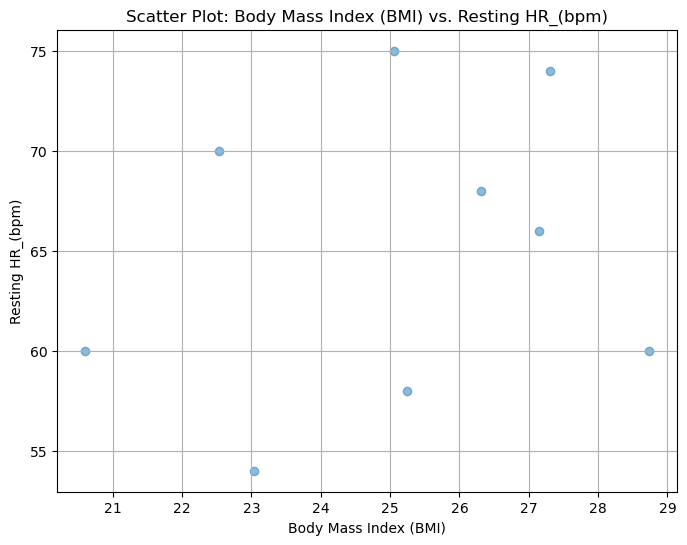

In [120]:
x_column = 'Body Mass Index (BMI)'
y_column = 'Resting HR_(bpm)'

plt.figure(figsize=(8, 6))
plt.scatter(df_subjects[x_column], df_subjects[y_column], alpha=0.5)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot: {x_column} vs. {y_column}')
plt.grid(True)
plt.show()
#reference lecture 3.ipynb

#### Above I create a scatter plot between BMI and Resting Heart rate. This is done order to observe any underlying correlations which may be apparent in our dataset between two such variables.

#### We can observe that from the plot that there seems to be positive correlation between the variables. This means that as your BMI increases, this also raises your resting heart rate. This seems to make sense, as such finding are supported, as higher weight gain increases your chances of having a heart attack, once you reach a particular BMI, such as overweight, or obese. Therefore, this would mean that your heart is finding it more difficult to pump blood around the body, and therefore has to work harder to do so, which is supported by the scientific medical literature, as abnormal weight is associated with higher heart rate (Hickcox et al., 2023).

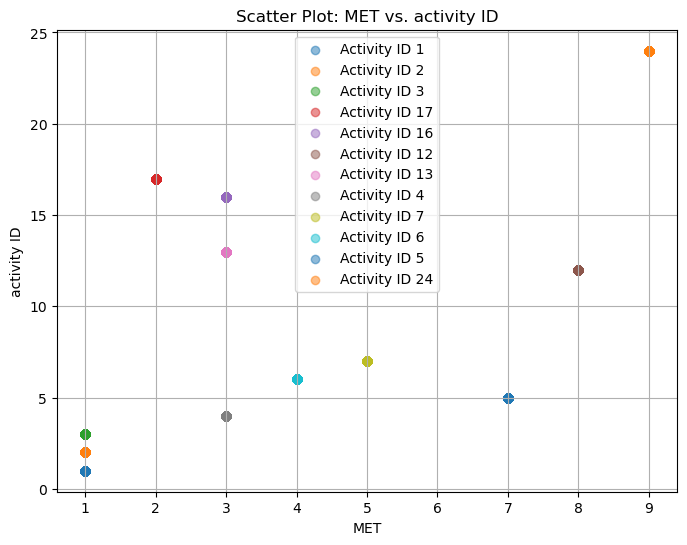

In [126]:
import matplotlib.pyplot as plt

unique_activity_ids = df_master['activity ID'].unique()

x_column = 'MET'
y_column = 'activity ID'

plt.figure(figsize=(8, 6))
for activity_id in unique_activity_ids:
    activity_data = df_master[df_master[y_column] == activity_id]
    plt.scatter(activity_data[x_column], activity_data[y_column], alpha=0.5, label=f'Activity ID {activity_id}')

plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot: {x_column} vs. {y_column}')
plt.legend()
plt.grid(True)
plt.show()
#reference lecture 3.ipynb


#### Here I am creating a scatter plot with MET, and activity as these are likely associated with BMI and heart rate, as activity raises heart rate, and lowers BMI, overtime.(Health Services, Measuring physical activity 2020)

#### MET is measuring the energy that is being required in order to perform a particular task, and so it is referred to as the metabolic equivalent of a task.

#### Bearing such information in mind, the graph that is being produced makes sense, given the context. This is because activities which have a higher overall heart rate, and require more exertion will cause the body to burn more energy (calories). This can be seen, as exericse 24 is jumping rome and that has a MET of 9, and so it is fairly intensive for the body. Whilst, activity 1, 2, and 3, which are lying, sitting, and standing don't require a lot of energy as they are not as intensive on the body, when performing such activities, as they are almost sedenatary, whilst jumping rope is moderate to high intensity exercise. (Health Services, Measuring physical activity 2020)

<module 'matplotlib.pyplot' from 'C:\\Users\\Aamir\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

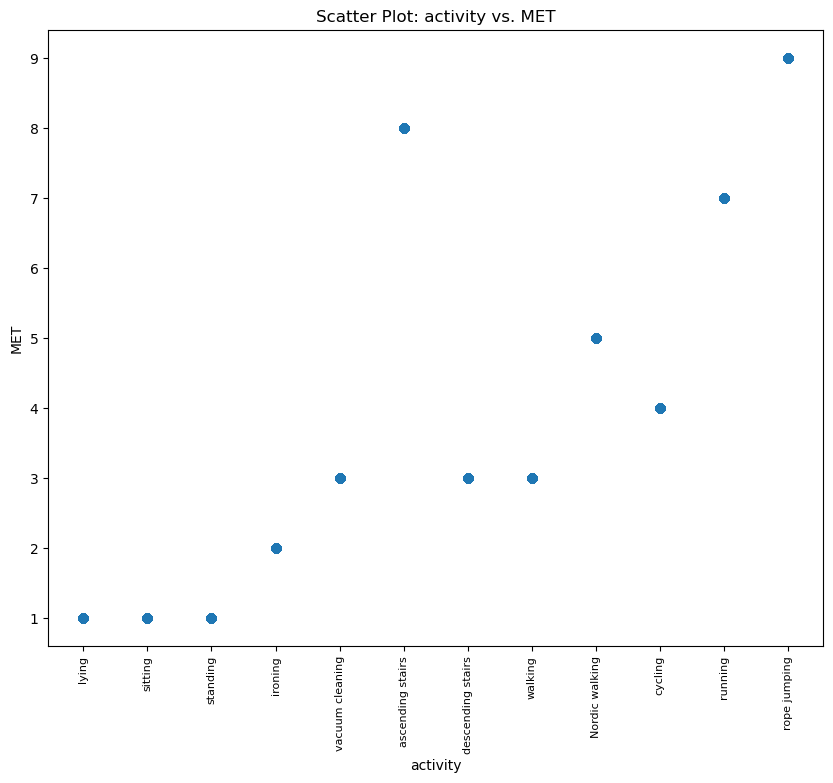

In [128]:
x_column = 'activity'
y_column = 'MET'

plt.figure(figsize=(10, 8))  
plt.scatter(df_master[x_column], df_master[y_column], alpha=0.5)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot: {x_column} vs. {y_column}')

plt.xticks(rotation=90) 

plt.xticks(fontsize=8)

plt
#reference lecture 3.ipynb

#### Here I change the format of activity, and produce a scatter plot from my dataframe with MET and activity. This time I am easily able to see which activities having the highest and lowest levels of MET from the axis, due to the formation of the graph, allowing me to uncover such relationships, more clearly. 

#### The plot indicates our findings more clearly, and supports the findings that we made earlier through attempting to indentify the relationship between MET and activity. This is that a more intensive task, leads to higher MET. This indicates a potential positive correlation between the intensity of activites, and MET, which does make sense, in accordance with the scientific findings. 

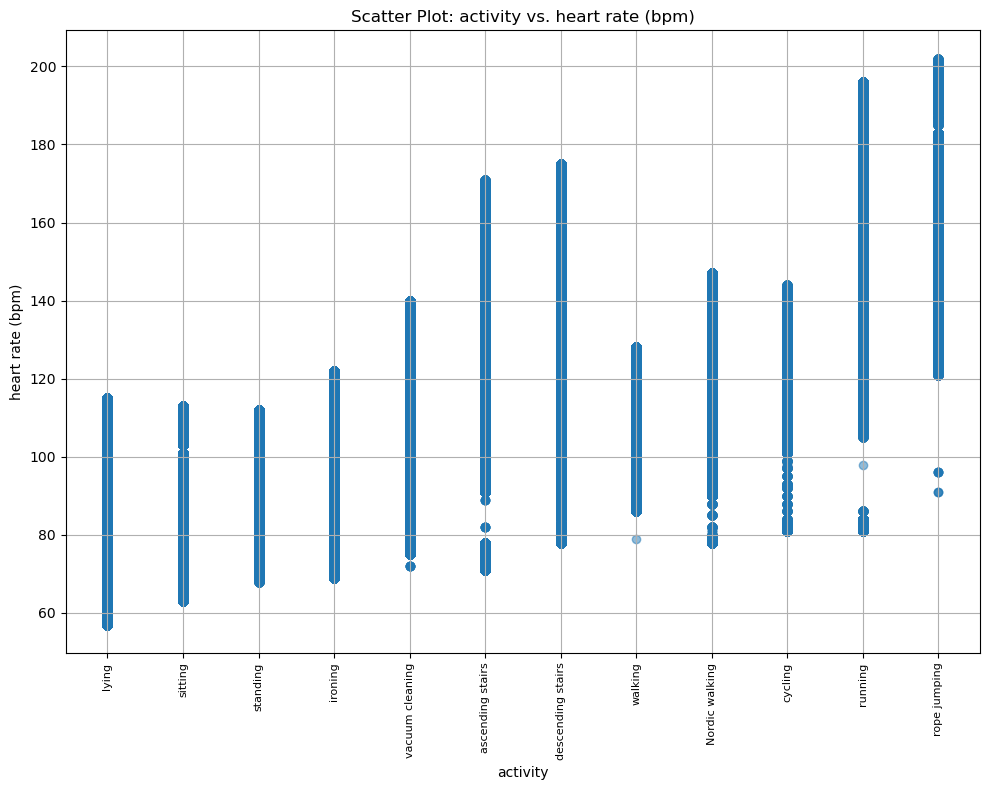

In [129]:
x_column = 'activity'
y_column = 'heart rate (bpm)'

plt.figure(figsize=(10, 8))  
plt.scatter(df_master[x_column], df_master[y_column], alpha=0.5)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot: {x_column} vs. {y_column}')


plt.xticks(rotation=90)  

plt.xticks(fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()
#reference lecture 3.ipynb

#### Higher heart rate has been associated with intensive physical activities throughout time, and has been related to caloric expenditure across time. Therefore, I wondered if the data that was provided displayed this relationship, and so I plotted a scatter plot in order to uncover the relationship between activity and heart rate(bpm).

#### The scatter plot supported our current understanding of physical activity, as those activities which were more intensive seemed to have overall higher heart rate, such as with jumping rope at figures reaching almost 200 bpm, with jump rope reaching a low of approximately 90 bpm. Whereas, activities such as lying had a lower overall high and low figure ranging from approximately 110-60bpm, depending on the subject. This would indicate a positive correlation betwen the two variables.

#### This would lead me to wonder what the relationship between heart rate and additional variables truly is, as it seems to play a prominent role in determining overall health, and ensuring athletic wellbeing. 

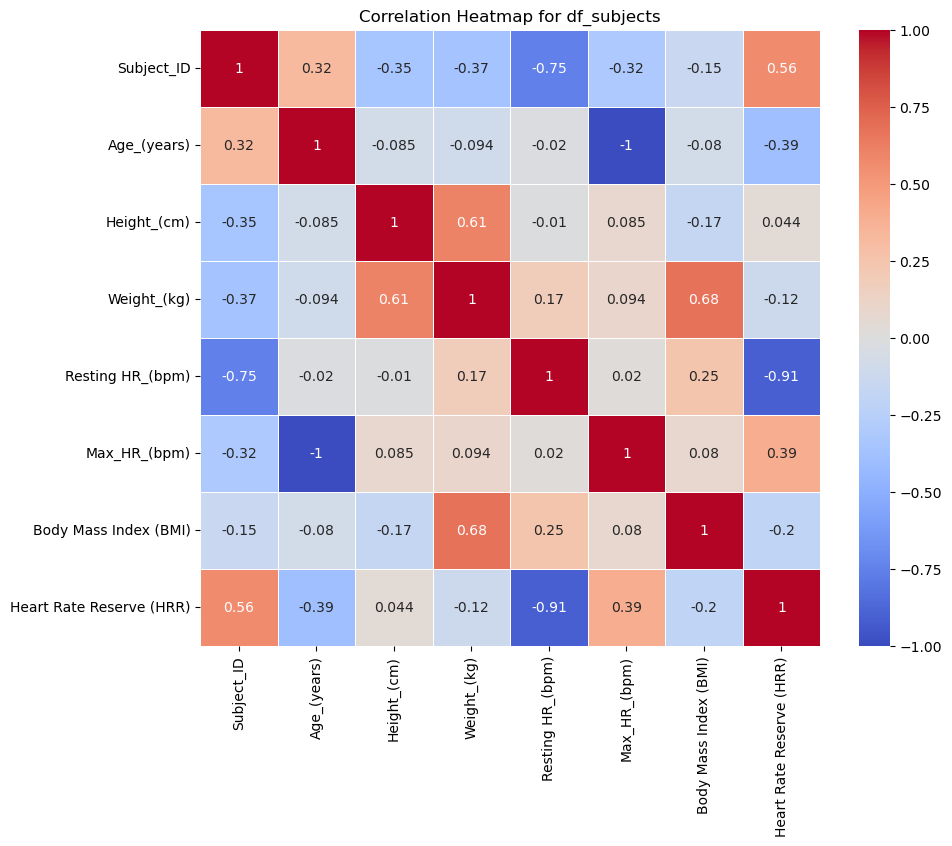

In [132]:
correlation_matrix = df_subjects.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap for df_subjects')  
plt.show()
#reference lecture 3.ipynb

#### I observed that I was paying close attention to the correlations and trends that formed the foundation of my main dataset, but was neglecting any potential correlations and trends that may hide within the second part of my dataset, as I had additional details placed within my dataframe named df_subjects. Therefore, I created a heatmap and included all variables placed within the data found within df_subjects.

#### To highlight there seems to be a strong negative correlation between heart rate reserve and resting heart rate of -0.91. This would mean that as heart rate reserve increases by one unit then resting heart rate would fall. This makes sense because if you are performing more intensive activites regularly your overall fitness would improve, and this would cause your resting heart rate to fall. (Reimers et al., 2018). Additionally, max heart rate and age also seem to have this strong negative correlation of -1. This seems to hold true, because as you age your heart cannot work, as hard, and your athletic abilities decline. (Reimers et al., 2018)

#### Height and weight also seem to have a strong positive correlation of 0.61. This is because those who are taller tend to weigh more on average, as those who are taller have larger muscles, and so hold more weight. 

#### There seems to be some other correlations present in the data, but I will not attempt to explain them further, as things such as heart rate or subject id seem to have strong correlations with the components that compromise them, and so would not make sense to attempt to explain or interpret. 

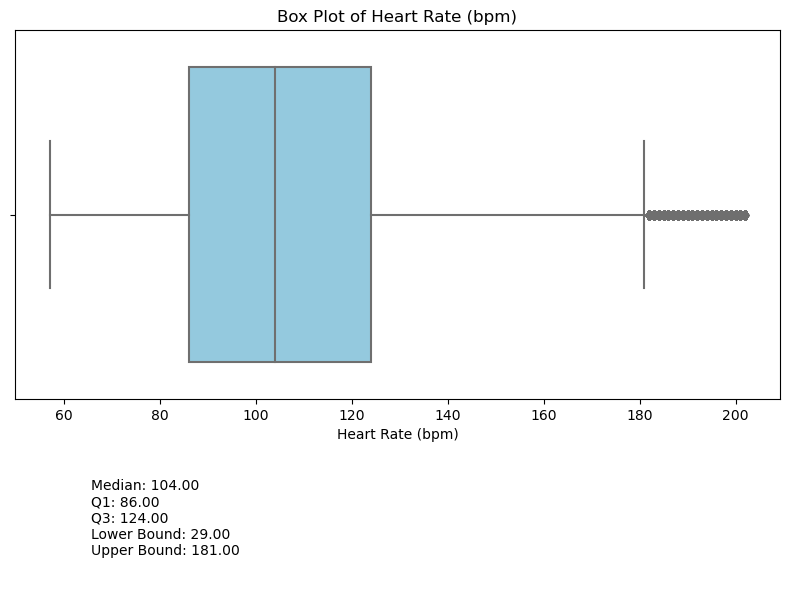

In [133]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 6), gridspec_kw={'height_ratios': [3, 1]})

sns.boxplot(x=df_master['heart rate (bpm)'], color='skyblue', ax=ax1)

median = df_master['heart rate (bpm)'].median()
q1 = df_master['heart rate (bpm)'].quantile(0.25)
q3 = df_master['heart rate (bpm)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

ax1.set_title('Box Plot of Heart Rate (bpm)')
ax1.set_xlabel('Heart Rate (bpm)')

ax2.axis('off')  # Hide axes in the lower subplot
summary_text = f'Median: {median:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}\nLower Bound: {lower_bound:.2f}\nUpper Bound: {upper_bound:.2f}'
ax2.text(0.1, 0.5, summary_text, verticalalignment='center', fontsize=10, color='black')

plt.tight_layout()

plt.show()
#reference lecture 3.ipynb

#### As the primary focus of the data has now become heart rate, I attempted to uncover additional details regarding heart rate in my main dataset, so I created a box plot in order to understand the values, to a greater degree. The reason that heart rate became my primary focus was because upon uncovering the values and correlations within the dataset and upon researching heart rate and the correlation it has with other variables such as MET, activity, and overall fitness and well being it seems to be a good indicator of determining such values, and plays a strong role in one's well-being so it is extremely important for the IMUs to do an excellent job of predicting such a vital metric. 

#### From this box plot we can observe that heart rate has a median value of 104. 

#### Contains a lower bound of 29 and upper bound of 181. 

#### Addtionally, with q1 = 86, this marks the 25th percentile, meaning 25% of the values for heart rate in my main dataset are below 86, and with q3 = 124. This marks the 75th percentile, meaning that 75% of values found within my dataset are above 124 bpm for the heart rate column. This makes sense as a lot of the activities conducted are heart rate raising, and we can only understand this further by looking more into how heart rate impacts individuals who perform such activities. 

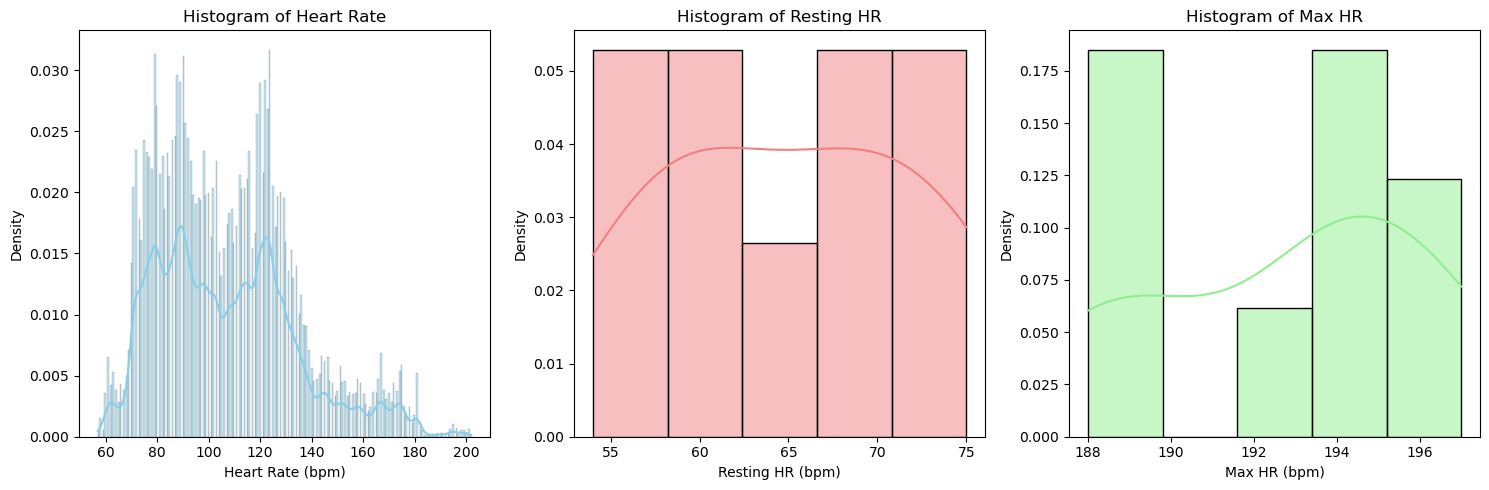

In [137]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df_master, x='heart rate (bpm)', kde=True, stat='density', color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Heart Rate')
axes[0].set_xlabel('Heart Rate (bpm)')
axes[0].set_ylabel('Density')

sns.histplot(data=df_subjects, x='Resting HR_(bpm)', kde=True, stat='density', color='lightcoral', ax=axes[1])
axes[1].set_title('Histogram of Resting HR')
axes[1].set_xlabel('Resting HR (bpm)')
axes[1].set_ylabel('Density')

sns.histplot(data=df_subjects, x='Max_HR_(bpm)', kde=True, stat='density', color='lightgreen', ax=axes[2])
axes[2].set_title('Histogram of Max HR')
axes[2].set_xlabel('Max HR (bpm)')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()
#reference lecture 3.ipynb

#### Such findings in heart rate, would seek me to try and understand the distribution of the dataset further, as it seemed that the scientific literature suggests that heart rate plays a vital role when it comes to measuring health indicators, and so I believe for the IMUs to sell well, this core component needs to be further analysed to ensure its reliability is accurate and strong.

#### Therefore, I created three Histograms. The first would be a Histogram of heart rate from my main dataframe df_master (from left to right). Whilst, the second is a Histogram of Resting Heart rate and the third is a Histogram of Max HR. 

#### These Histograms represent the distribution of data for different aspects of heart rate.

#### The first Histogram shows that heart rate does not follow a standard distribution, instead what could be said to categorise this is that the data follows a bimodal distribution. This potentially could be suggesting that different clusters or groups within the data could be corresponding to different activities which are of different intensities, which could explain the two peaks that are occuring, with a wide ranging of values being apparent. 

#### The second Histograms, resting heart rate is quite narrow. This could mean that the values that are found in resting heart rate are quite narrow. This distribution is unimodal with a peak in the centre of the data. This narrow range of values could potentially indicate that there are subjects with a similar background, age, or overall level of fitness when it comes to performing the activities with the IMUs. 

#### Lastly, Max HR also follows a similar pattern as the Histogram before it. This is because it follow a unimodal distribution but the seems to be skewed towards the right. This could be reflecting higher heart rates that are achieved through the subjects conducting exercises that are quite intensive and so require the heart to bump harder and faster. This could also potentially suggest that the subjects that are being extracted from the provided data may not be the most athletic, and so have much higher heart rates than the regular active individual. 

## Mathematical modelling:

#### I observed that throughout the health data, and throughout the scientific literature that a core data for IMUs, and products that compromise the market for health data products, such as Apple Watches, IPhones, Samsung Watches or Fitbits and Garmin watches use some kind of measurement for heart rate tracking and have IMUs added in, so due heart rates overwhelming importance in predicting health outcomes and tracking performance. Therefore, I find it only appropriate that I develop a mathematical model to predict heart rate, based on the other variables in my dataset that I have utilised throughout my report. 

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

df_model = df_master.drop('heart rate (bpm)', axis=1)  # Features
y = df_master['heart rate (bpm)']  # Target

x_train, x_test

(         MET  hand - temperature  chest - temperature  ankle - temperature
 1678063    5             34.8125              38.5000              34.3125
 2403849    5             33.0625              38.3750              32.4375
 682741     3             31.0625              36.0000              34.2500
 1738875    7             33.8125              36.6250              34.0000
 722584     5             30.2500              35.1875              34.0000
 ...      ...                 ...                  ...                  ...
 2638934    3             34.1250              38.0000              34.0625
 2014799    3             32.5000              36.6875              35.0000
 1650690    3             34.6250              38.2500              34.1875
 1360000    5             29.1250              34.5000              32.8750
 1553030    3             35.2500              37.6875              34.3125
 
 [960715 rows x 4 columns],
          MET  hand - temperature  chest - temperature  an

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_combined = df_master.merge(df_subjects[['Subject_ID', 'Body Mass Index (BMI)', 'Heart Rate Reserve (HRR)']],
                              on='Subject_ID', 
                              how='left')

df_model = df_combined[['MET', 'hand - temperature', 'chest - temperature', 'ankle - temperature',
                        'hand - 3D-acceleration scale: ±16g, resolution: 13-bit -1',
                        'chest - 3D-acceleration scale: ±16g, resolution: 13-bit -1',
                        'ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -1',
                        'ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -2',
                        'ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -3',
                        'chest - 3D-magnetometer -1', 
                        'chest - 3D-magnetometer -2',
                        'chest - 3D-gyroscope -1',
                        'hand - 3D-gyroscope -1',
                        'Body Mass Index (BMI)',
                        'Heart Rate Reserve (HRR)',
                        'heart rate (bpm)']]

X = df_model.drop(columns=['heart rate (bpm)'])
y = df_model['heart rate (bpm)']

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=20)
heart_rate_model = LinearRegression()
heart_rate_model.fit(x_train, y_train)
model_output_df = pd.DataFrame(heart_rate_model.coef_, x_train.columns, columns=["Coefficient"])
model_output_df['Coefficient'] = model_output_df['Coefficient'].apply(lambda x: '{:.2f}'.format(x))
print(model_output_df)
#referenece 237779_DSRM Report 2-checkpoint.ipynb

                                                   Coefficient
MET                                                       7.53
hand - temperature                                       -3.57
chest - temperature                                       1.10
ankle - temperature                                       0.37
hand - 3D-acceleration scale: ±16g, resolution:...       -0.31
chest - 3D-acceleration scale: ±16g, resolution...       -0.22
ankle - 3D-acceleration scale: ±16g, resolution...        0.19
ankle - 3D-acceleration scale: ±16g, resolution...        0.13
ankle - 3D-acceleration scale: ±16g, resolution...        0.06
chest - 3D-magnetometer -1                                0.03
chest - 3D-magnetometer -2                               -0.20
chest - 3D-gyroscope -1                                  -0.47
hand - 3D-gyroscope -1                                    0.24
Body Mass Index (BMI)                                    -0.60
Heart Rate Reserve (HRR)                               

#### To begin I create a multiple linear regression model with heart rate as a function of all the other variables that are included inside of my dataset. I am going to be using heart rate as my dependant variable, and including one of each other variable from my code. This will include hand-temprature, MET, ankle temp, chest-temp, and a gyroscrope measurement from each body part, alongside an acceleration scale of 16 grams from each body part. 

#### I did not include all variables, as the explantory power of the model should be sufficient, given that I have included one of each major category and one of each measurement from each body part. Addtionally, I merged the datasets together for this regression to maximise the explantory power of the model so that no coefficient is overestimated to such a great degree. Also, as BMI is height and weight combined, so I did not include those, not did I include the other heart rate measurements, due to the strength of HRR, from its composition. 

#### From observation we can see that MET has a strong positive correlation with heart rate of 7.53, which supports our findings as those who exercise more burn more calories, and energy.

#### Hand- temprature has a strong negative correlation of -3.57. This is likely, due to the sweat coming out cooling down the hand, due to having a higher heart rate. 

#### BMI has a moderate negative correlation of -0.60. This is likely as BMI rises inactivity increases, and so does weight so heart rate does not rise as much.

#### HRR has a moderate negative correlation of -0.49. This means that as heart rate falls individuals likely have a higher reserve.

#### As the other variables played an insignificant role, or had negligible correlation I didn't interpret them. 

In [46]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = heart_rate_model.predict(x_test)

# Calculate the metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
#referenece 237779_DSRM Report 2-checkpoint.ipynb

R-squared: 0.68
Mean Absolute Error: 11.18
Mean Squared Error: 230.82
Root Mean Squared Error: 15.19


#### Above I compute the R squared and mean absolute error, with the root mean squared error and the mean squared error. 

#### The results indicate the model does a good job of predicting heart rate, as 68% of the variance in heart rate can be explained by the model. 

#### Mean absolute error of 11.18 indicates that the model has the bpm off by 11.18 when attempting to predict the heart rate. This suggests that the model could be improved, but is quite reliable as products such as Apple only include an approxmiation similar to this when predicting heart rate. 

#### Overall, the model is a good fit, but the precision of the model could be improved given the high mean squared erroe and root squared mean, as such high values suggest that the precision of the model can be quite far from the true values sometimes, which suggests that other factors may also influence heart rate. 

DataFrame is not empty.
Column names in DataFrame: ['Subject_ID', 'timestamp (seconds)', 'MET', 'activity', 'activity ID', 'heart rate (bpm)', 'hand - temperature', 'hand - 3D-acceleration scale: ±16g, resolution: 13-bit -1', 'hand - 3D-acceleration scale: ±16g, resolution: 13-bit -2', 'hand - 3D-acceleration scale: ±16g, resolution: 13-bit -3', 'hand - 3D-gyroscope -1', 'hand - 3D-gyroscope -2', 'hand - 3D-gyroscope -3', 'hand - 3D-magnetometer -1', 'hand - 3D-magnetometer -2', 'hand - 3D-magnetometer -3', 'chest - temperature', 'chest - 3D-acceleration scale: ±16g, resolution: 13-bit -1', 'chest - 3D-acceleration scale: ±16g, resolution: 13-bit -2', 'chest - 3D-acceleration scale: ±16g, resolution: 13-bit -3', 'chest - 3D-gyroscope -1', 'chest - 3D-gyroscope -2', 'chest - 3D-gyroscope -3', 'chest - 3D-magnetometer -1', 'chest - 3D-magnetometer -2', 'chest - 3D-magnetometer -3', 'ankle - temperature', 'ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -1', 'ankle - 3D-accelerati

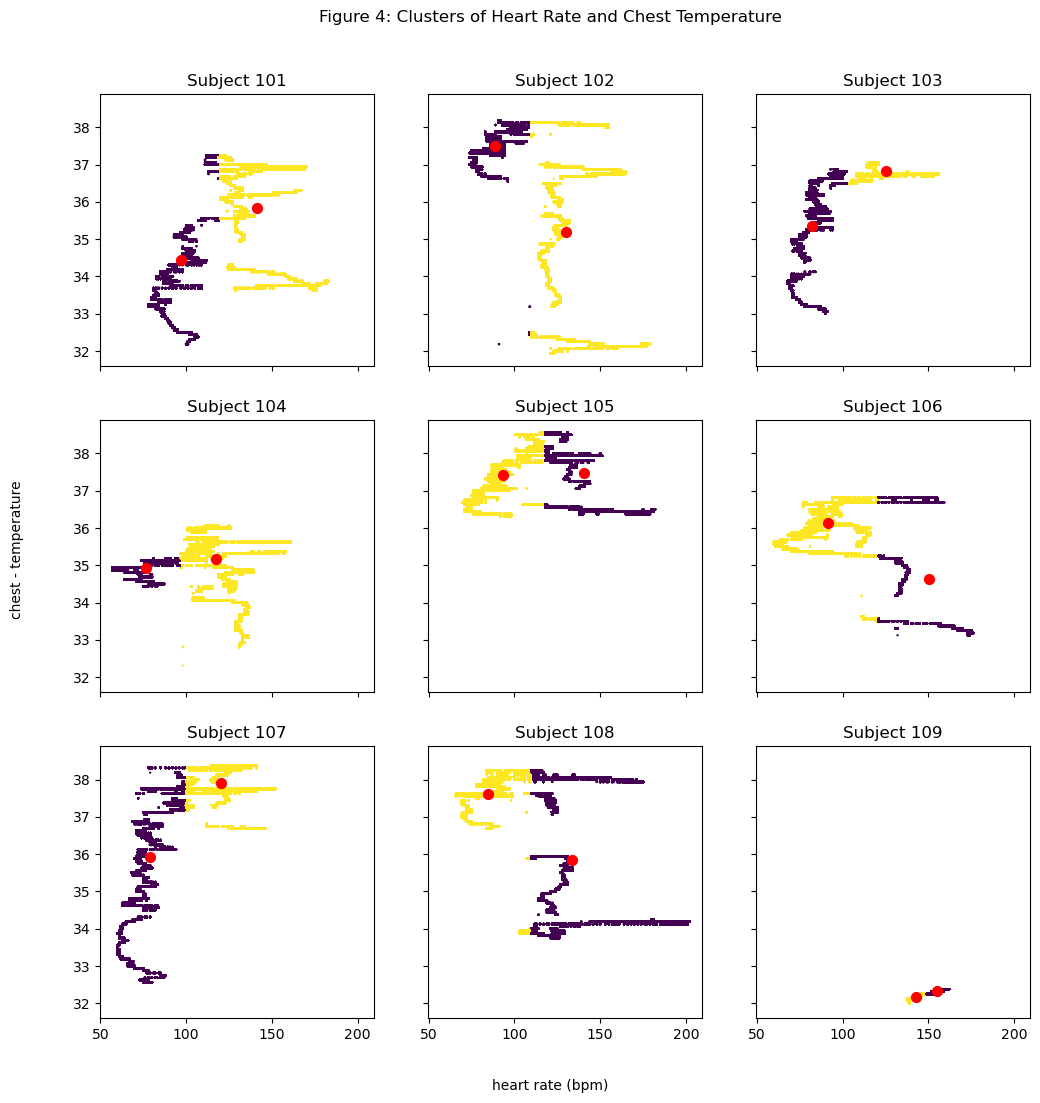

In [51]:
if df_master.empty:
    print("DataFrame is empty!")
else:
    print("DataFrame is not empty.")

print("Column names in DataFrame:", df_master.columns.tolist())

required_columns = ["heart rate (bpm)", "chest - temperature",]
for col in required_columns:
    if col not in df_master.columns:
        print(f"Column '{col}' not found in DataFrame.")

model = KMeans(init='random', n_clusters=2)

fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(12, 12), constrained_layout=False)

for i in range(1, 10, 1):
    subject_id = 100 + i  
    subject_filter = df_master['Subject_ID'] == subject_id  

    if not df_master[subject_filter].empty:
        Z = df_master.loc[subject_filter, required_columns].to_numpy()

        if Z.size > 0:
            model.fit(Z)
            y_kmeans = model.predict(Z)
            plt.subplot(330 + i)
            plt.scatter(Z[:, 0], Z[:, 1], c=y_kmeans, s=0.5)
            centres = model.cluster_centers_
            plt.scatter(centres[:, 0], centres[:, 1], c='r', s=50)
            plt.title('Subject ' + str(subject_id))
        else:
            print(f"No data for Subject_ID {subject_id}. Z is empty.")
    else:
        print(f"No rows found for Subject_ID {subject_id}.")

fig.text(0.5, 0.05, 'heart rate (bpm)', ha='center')
fig.text(0.05, 0.5, 'chest - temperature', va='center', rotation='vertical')
plt.suptitle('Figure 4: Clusters of Heart Rate and Chest Temperature', y=0.95)

plt.show()
#referenece 237779_DSRM Report 2-checkpoint.ipynb

#### Above I utilised k-means clustering in order to create my second model. This was done in order to see what proportion of heart rate is coming from high intensity vs low intensity activities. The k-means cluster has one closer as intensive activities, such as jumping rope and the other as non-intensive activties, such as lying. 

#### The graph indicates to us that there is signficant variation in heart rate when individuals perform low intensity vs high intensity activties. The diagonal pattern of the cluster illustrates the positive relationship of the variables. 

#### Subject 109 having small variation in HR could suggest the individual did not vary their activities, and performed few activities, or perhaps had a unique condition. I did not include MET, as this was a new variable added, which although positively correlated was difficult to interpret for stakeholders.

## Conclusion

#### To conclude, to improve the mathematical modelling capabilities that we are able to compute with our data, we will likely need a larger sample size, as 9 subjects is insufficient in providing real world data which we will extract and apply to whole populations.

#### If Trivisio is going to sell large quantities of this new wireless unit, then it will can utilise the heart rate prediction system and focus predominantly on ensuring that such data collection is vast and reliable to use in its system, as we can relatively accurately predict heart rate based on a multitiude of variables, but to further such predictions we require a heightened sample size, and also data across time to test the validity of such data, alongside other variables such oxygen, sleep, and heart scanning, as newer IMUs such as the Apple Watch 13 perform such activities, therefore to secure a strong market position our product should be capable of such feats, but this can only be done with newly available data in such domains. 
